In [4]:
import numpy as np
import matplotlib.pyplot as plt

#### set + initialize

In [235]:
# set
runtime = 10000 # years
dx = 1
dt = 1 #year
rho_ice = 917 # kg/m3
A = 2.1*(10**-16)  # Arrhenius constant [mPa/yr]
N = 3 # shape factor from Glen's Flow Law
g = 9.81 # m/s2 gravitational acceleration
gamma = 0.01 # mass balance gradient [(m/yr)/m]
valley = 1500 # elevation of valley floor (minimum elevation)
ela = 1900 # Equilibrium line altitude
hor_dist = np.arange(0,2000,dx) # x-array
slope= np.radians(20) # slope in degrees
z_bedrock = valley+(2000-hor_dist)*np.tan(slope) # glacier bed

#initialize
H = np.zeros(len(hor_dist))# ice thickness array
b = np.zeros(len(hor_dist))# mass balance array
z_glacier = valley+(2000-hor_dist)*np.tan(slope)# glacier surface elevation array
ice_slope = np.diff(z_glacier) # glacier surface slope array
H_edge = np.zeros(len(ice_slope)) # ice thickness edge array
Q = np.zeros(len(ice_slope))# ice discharge array

#### run model

In [236]:
for i in range(runtime):
    ice_slope = np.diff(z_glacier)/dx # calculate surface slope of ice
    H_edge = H[1:] # ice thickness - use H from upwind cell as H_edge
    Q = A*((rho_ice*g*(-ice_slope))**N)*((H_edge**N+2)/5) # calcultate ice flux from on cell to the next (per year)
    dQdx = np.diff(Q)/dx # calculate gradient of ice flux across cell boundaries
    b = gamma*(z_glacier-ela) # ice loss and gain based on elevation dependent mass balance gradient
    dHdt = b[1:-1] - dQdx # rate of change of ice thickness
    H[1:-1] = H[1:-1] + (dHdt/dt) #update ice thickness with newly gained or lost ice
    H[H < 0] = 0 # prevent ice thickness from getting negative
    z_glacier[1:-1] = H[1:-1] + z_bedrock[1:-1] # update ice elevation

/Applications/anaconda3/envs/SpatialDataProgramming/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in multiply
  
/Applications/anaconda3/envs/SpatialDataProgramming/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in power
  
/Applications/anaconda3/envs/SpatialDataProgramming/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in subtract
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda3/envs/SpatialDataProgramming/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


# plot

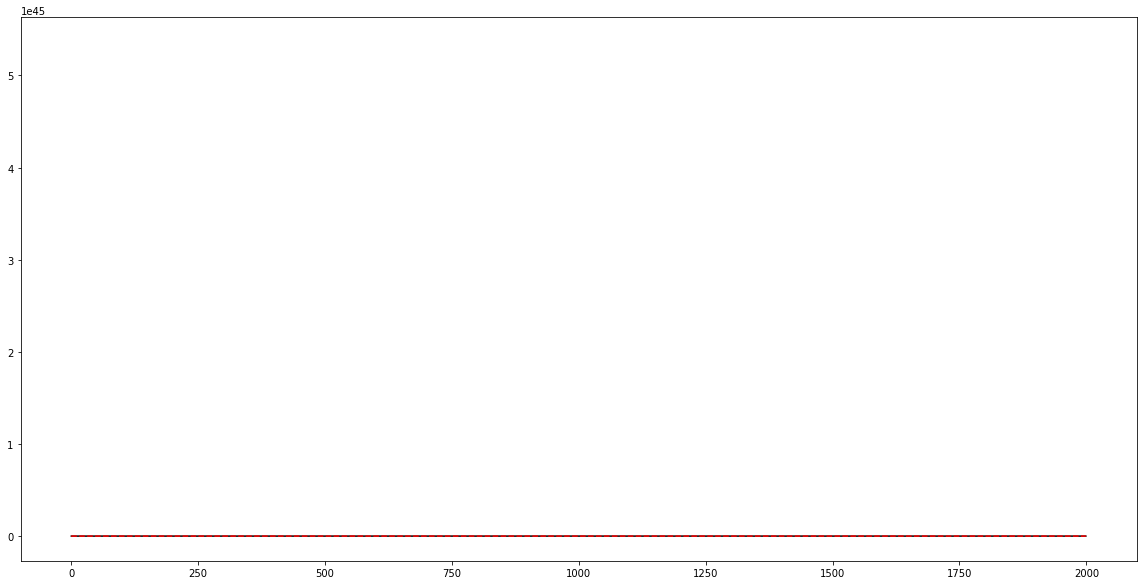

In [237]:
plt.figure(figsize=(20,10))
plt.plot(hor_dist,z_bedrock,'k')
plt.plot(hor_dist,np.ones(2000)*ela,'--',color='red')
plt.plot(hor_dist,z_glacier,'b')
plt.show()